# numpyを使う Use numpy
前節では、行列の基本的な演算をおこなう関数を一通り準備しました。Numpyは行列計算を含む、高度な数値計算を高速に行うライブラリで、これを使うと、行列計算の関数は自作する必要がまったくなくなります。(とはいえ、スキルを上げるためには、自分で書けたほうが良いです)

Numpy is a python library for fast calculation including the linear algebra.  With numpy, you do not need to program matrix and vector calculations by yourself any longer. (But you should better be able to program them by yourself for brush up your skills.) 

### ベクトル Vector
numpyには、arrayと呼ばれる、リストに似たデータ形式があります。違うのは、arrayには同じ種類のデータしか入れられない点です。実際のところ、listは簡単にarrayに変換できます。

There is a list-like data sequence type called `array` in numpy.  You can put the data of the same type (typically floating point numbers) in an array.  Indeed, a list can be converted to an array very easily.

In [ ]:
import numpy as np

L = [1.0,2.0,3.0]
vector = np.array(L)
vector

要素が0や1ばかりのarrayを作る便利な関数があります。

There are convenient functions to make arrays of zeros or ones.  

In [ ]:
zero = np.zeros(10)
one = np.ones(10)
zero,one

arrayの一部分をとりだす方法は、listと同じです。

You can pick up a part of the array in the same way as the list.

In [ ]:
vector[1],vector[1:3]

しかし、演算子を使う時に、大きな違いがあります。list同士を足し算すると、長いリストになるのに対し、array同士を足すと、ベクトルの加算を行ってくれます。

The biggest difference is that an array is actually a vector in mathematics. You can calculate them directly with algebraic operators without writing loops.

In [ ]:
L1 = [1,2,3]
L2 = [4,5,6]
print(L1+L2)

In [ ]:
v1 = np.array(L1)
v2 = np.array(L2)
print(v1+v2,v2-v1)

ベクトルに定数を掛けることも可能です。

Product of an array and a number becomes an array.

In [ ]:
v1*10

ベクトル同士のかけ算をすると、どうなるでしょうか。

How about multiplying two vectors together?

In [ ]:
v1*v2

要素同士がかけあわされたarrayになりました。この要素を足しあわせれば、2つのベクトルの内積(dot product)が得られます。

Elements of the vectors are multiplied individually. When you want the dot product (inner product) of the vectors, just sum them up.

In [ ]:
sum(v1*v2)

ですが、これだと一見して何を計算しようとしているのかわかりにくいので、dot関数を使いましょう。

Easier way to get a dot product is to use the `dot()` function.

In [ ]:
np.dot(v1,v2)

外積(cross product)はcross関数で計算できます。(外積って何だったか覚えていますか?)

It is also easy to calculate the cross product (outer product) of the vectors. (Do you remember the definition?)

In [ ]:
np.cross(v1,v2)

これで、ベクトルの基本的な計算はすべてできることがわかりました。

Thus you can calculate the vectors with numpy very easily.

ちなみに、文字列データからarrayを作る簡単な方法があります。三連ダブルクオーテーションは、改行を含む文字列を定義したい時に使います。

Here is an easy way to make a numpy array from a string.  Here the triple double-quotations `"""` is useful to define a long string with linefeeds.

In [ ]:
s = """
1  2
3   4
5    6
"""
v = np.fromstring(s, sep=" ")
v

`fromstring()`は改行も空白と同一視し、一列のarrayに変換してしまいます。
これを、3行2列の行列(後述)にしたい場合は、`reshape`関数を使います。`reshape`はその名の通り、1次元(あるいは多次元)のarrayの形を変形して多次元arrayにしてくれます。

The function `fromstring()` regards the linefeeds as a type of space character and convert the string into a one-dimensional array of floating point numbers.
If you want to make it as a (3,2) matrix, use `reshape` function.
`Reshape` changes the shape of the array.

In [ ]:
w=v.reshape((3,2))
w

`.shape`(これは関数ではありません)を次のように使うことで、その行列のshapeを知ることができます。このことからもわかるように、listとは違い、多次元のarrayでは、各行の長さはすべて等しくなければなりません。(listの場合は、`[[1,2],[3,4,5]]`のような長さの違う要素でも構いません。)

The following is the way to know the shape of an array.  As you see, the array must be rectangular, i.e., the lengths of the rows must be identical. (In the case of a list, on the other hand, you can make a list of lists of different length, e.g. `[[1,2],[3,4,5]]`.)

In [ ]:
w.shape

もうすこし、arrayの操作を練習してみましょう。

Let's practice the array operations further.

In [ ]:
v=np.array([1.,2.,3.,4.,5.])

1番目から3個の要素をとりだす方法はリストの場合と同じです。

Here is a way to pick up the three elements from element 1 (is the second element of the array).

In [ ]:
v[1:1+3]

:を使った記法では、v[start:end]のほかに、v[start:end:interval]という書き方があります。
startが0の場合には省略できます。endが最後の要素の場合にも省略できます。
例えば、0番目から最後の要素まで、1つとばしで選ぶ場合は、v[0:5:2]あるいはv[::2]と書きます。

There are two types of colon notations: `v[start:end]` and `v[start:end:interval]`.
You can omit the start value if it is zero. 
You can also omit the end value if it is the last one.
For example, v[0:5:2] or v[::2] picks up the every two elements starting from the element 0.

In [ ]:
v[::2]

v[:]はvの全要素という意味で、vと同じ意味になります。

v[:] is the same meaning as v.

In [ ]:
v[:]+10

In [ ]:
v+10

例えば、ベクトルの要素の順番を逆にするにはどうしたらいいでしょうか?
リストの場合には、そのための特別な命令reverse()がありますが、numpyではそんなものがなくても簡単に逆順にできます。

How to invert the order in an array?
There is a special function `reverse()` to invert a list, while it is "piece of cake" for an numpy array.

In [ ]:
v[::-1]

ほかにもいろんな書き方を試してみて下さい。

Let's try other notations.

In [ ]:
v[::-2]

In [ ]:
v[-1:-3:-1]

In [ ]:
v[1::2]

ひとつ気をつけないといけないことは、こうしたarrayの変形は、実際にはvを加工**しているわけではない**ことです。
例えば、巨大なarrayを変形するたびに、内容のコピーを作っていたのではコピーにかかる時間が馬鹿になりません。

次の例では、wに入るものは、vから要素を抜きだしたコピーではなく、vから要素を抜きだす「手順」です。

Note that these array modification operations do not actually modify the v itself for efficiency.

In the following example, w is not a copy of v but w shares the part of v.

In [ ]:
w=v[1::2]
w

wはvのコピーではないので、wの値を変えると、vの値が変わってしまいます。

The values in w is shared with v, so if you modify an element in w, it also change the corresponding element in v.

In [ ]:
w[0]=9
v

vに影響を与えないように要素を抜きだす場合には、コピーする必要があります。

To avoid the side-effect, you should copy it explicitly.

In [ ]:
w = v[1::2].copy()
w

In [ ]:
w[:]=8
v, w

### 行列 Matrix
次に行列に挑戦します。2次元のリストをarrayに変換すると、行列として扱われます。

Matrix is a 2D array in numpy.

In [ ]:
LX = [[1,2,3],
      [4,5,6],
      [7,8,9]]
LX

In [ ]:
NX = np.array(LX)
NX

0ベクトルと同じように、0行列も簡単に作れます。

To make a zero matrix, use zeros function again.

In [ ]:
np.zeros((3,3))

単位行列もよく使います。

Identity() function is also useful.

In [ ]:
np.identity(3)

行列(あるいは多次元のarray)の要素を指定する時は、リストの場合よりも直感的な表記ができます。

The notation to specify the part of a matrix is slightly different from that of a list.

In [ ]:
print(LX[1])
print(NX[1])
print(LX[1][1])
print(NX[1,1])

また、多次元arrayを切り出す場合には、":"(コロン)を使った独特の記法が使えます。おなじことを多次元リストに対してやろうとすると、forループを書かざるをえません。

You can crop a matrix by using ":" notation.  There is no correspondent way for a multidimensional list.

In [ ]:
print(NX[1:3,1:3])
print(NX[0:2,2])

同じことを多次元リストに対して行うと、とても直感的でないことが起こります。

If you use the similar notation for a multidimensional list, it works in a non-intuitive way.

In [ ]:
print(LX[1:3][1:3])

行列NXにベクトルを掛けてみます。

How about the product of a matrix and a vector?

In [ ]:
v = np.array([10,100,1000])
NX*v

これは妙な計算になってしまいました。では、dotなら?

It is a strange result. Then how about using the dot product?

In [ ]:
np.dot(NX,v)

vと答の両方が縦ベクトルだと思えば、ちゃんと行列とベクトルのかけ算になっていることはわかると思います。

It seems correct so far.

では、行列のかけ算を試してみましょう。

Then how about the dot product of two matrices?

In [ ]:
A = np.array([[1,1],
              [2,2]])
B = np.array([[3,4],
              [3,4]])
print(np.dot(A,B))
print(np.dot(B,A))

ちゃんと順序通りのかけ算ができることがわかりました。

It works nicely.

行列を2乗すると?

How about the square of a matrix?

In [ ]:
A**2

だめでした。ベクトル同士を"\*"した時と同じように、要素ごとのかけ算になってしまいました。やはり、次のように書かないといけないようです。

Nope. The use of normal "\*" operator does not work as we expect.  So let's use the dot product again.

In [ ]:
np.dot(A,A)

転置行列はtranspose関数か、または簡単に.Tで作れます。

Transposition of a matrix is easy.

In [ ]:
np.transpose(A)

In [ ]:
A.T

行列式、逆行列も簡単です。numpyの拡張ライブラリlinalg(Linear Algorithm?)の中に、いろんな関数が準備されています。

In [ ]:
A = np.array([[1,1],[1,2]])
B = np.linalg.inv(A)
d = np.linalg.det(A)
print(B)
print(np.dot(A,B))
print(np.dot(B,A))
print(d)

行列計算で、あと面倒くさいものといえば、固有値計算ですが、これもnumpyに組みこまれています。

ある行列Aに対し、次のような関係を満たす数$a$とベクトル$\vec{v}$を、固有値と固有ベクトルと呼びます。
$$A\vec{v}=a\vec{v}$$

In [ ]:
A = np.array([[1,1],[1,2]])
np.linalg.eig(A)

eig関数は、2つの値を返すことがわかります。1つめのarrayは、2つの固有値を含んでいます。そして、2つめの2次元arrayには、対応する固有ベクトルが行列の形で含まれています。ただし、縦に入っているらしいので、個々のベクトルを取りだす時には一工夫必要です。

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors= np.transpose(eigenvectors)   #転置する
print(eigenvalues[0],eigenvectors[0])
#上の関係式を満たすかどうか確認する。
print(eigenvalues[0]*eigenvectors[0], np.dot(A,eigenvectors[0]))

数値計算では、通常のリストの代わりにnumpyのarrayを使うことをおすすめします。ベクトルや行列の計算が簡単にでき、プログラムがすっきりするというメリットの他に、計算が非常に高速になるというメリットもあります。

In [ ]:
import numpy as np
import time

#リストLの各要素をx倍する。
def mul_list(L,x):
    ans = []
    for i in L:
        ans.append(i*x)
    return ans

#array Aの各要素をx倍する。
def mul_array(A,x):
    return A*x

L = list(range(1000000))
A = np.array(L)

#time()関数は現在の時刻(秒)を教えてくれます。
#関数を実行する前と後の秒の差をとると、実行時間がわかります。

#リストの場合
now = time.time()
mul_list(L,10)
print(time.time()-now)

#arrayの場合
now = time.time()
mul_array(A,10)
print(time.time()-now)



所要時間に30倍以上の差があることがわかりました。

データが大きくなればなるほど、numpyは威力を発揮します。ここでは、3次元の小さな行列やベクトルしか扱いませんでしたが、フーリエ変換や相関関数の計算も、つきつめれば超多次元のベクトルや行列の演算とみなせます。

最後に、少し変態的なnumpyの機能を紹介します。

まず、randomライブラリを使って、-1から+1の間の乱数を100個作り、array aに入れます。

In [ ]:
import random
a = np.array([random.random()*2-1 for x in range(100)])
print(a)

arrayに対して定数の足し算やかけ算をすると、個々の要素に対して定数が足されたり掛けられたりしました。

それと同じように、arrayに対して比較演算子を使うと、個々の要素に対して比較が行われ、その結果が論理型(True or False)のarrayになります。

In [ ]:
b = (a > 0)
print(b)

そして、aの引数を指定する代わりに、論理型のarrayを与えると、真(True)な要素だけを抽出できます。

In [ ]:
c = a[b]
print(c)

途中の変数bやcを使わないで、次のように書いても同じように動作します。

In [ ]:
print(a[a>0])

これも、大量のデータを操作するときには欠かせない機能です。この機能のおかげで、arrayを利用すると、forループ処理を書かなくてすみます。

### 練習問題1
次の覆面算を解いてみましょう。ただし、H=0とします。

Let's solve the following simultaneous equations.

1. O+N+E = 1
* T+W+O = 2
* T+H+R+E+E = 3
* F+O+U+R = 4
* F+I+V+E = 5
* S+I+X = 6
* S+E+V+E+N = 7
* E+I+G+H+T = 8
* N+I+N+E = 9
* T+E+N = 10
* ....

これは、一見複雑に見えますが、たんなる連立方程式の求解です。全部まとめて解くのは難しいので、この中で同じ変数が適度にまず、でてくる変数を並べると、

It seems quite wierd, but it is just a normal simultaenous equation, so you can solve it with linear algebra. 

* 1.だけだと(O,N,E)
* 2までだと(O,N,E,T,W)
* 3までだと(O,N,E,T,W,R)
* 4までだと(ONETWRFU)
* 5までだと(ONETWRFUIV)
* 7までだと(ONETWRFUIVSX)
* 10までだと(ONETWRFUIVSXG)
* 14までだと(ONETWRFUIVSXGL)

で、14まで並べれば、変数の個数と方程式の個数が等しくなり、解けるかもしれないことがわかります。

連立方程式を解くことは、逆行列を求めることにほかなりません。

In [ ]:
#              O N E T W R F U I V S X G L
A = np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,0],   #ONE
              [1,0,0,1,1,0,0,0,0,0,0,0,0,0],   #TWO
              [0,0,2,1,0,1,0,0,0,0,0,0,0,0],   #THREE
              [1,0,0,0,0,1,1,1,0,0,0,0,0,0],   #FOUR
              [0,0,1,0,0,0,1,0,1,1,0,0,0,0],   #FIVE
              [0,0,0,0,0,0,0,0,1,0,1,1,0,0],   #SIX
              [0,1,2,0,0,0,0,0,0,1,1,0,0,0],   #SEVEN
              [0,0,1,1,0,0,0,0,1,0,0,0,1,0],   #EIGHT
              [0,2,1,0,0,0,0,0,1,0,0,0,0,0],   #NINE
              [0,1,1,1,0,0,0,0,0,0,0,0,0,0],   #TEN
              [0,1,3,0,0,0,0,0,0,1,0,0,0,1],   #ELEVEN
              [0,0,2,1,1,0,0,0,0,1,0,0,0,1],   #TWELVE
              [0,1,2,2,0,1,0,0,1,0,0,0,0,0],   #THIRTEEN
              [1,1,2,1,0,1,1,1,0,0,0,0,0,0]])  #FOURTEEN
V = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
print(np.linalg.det(A))

残念ながら、Aが特異行列らしく、逆行列が作れません。そこで、いろいろ試行錯誤した結果、#TWOの行を削り、代わりに#FIFTEENを追加すると、Aが特異行列でなくなることがわかりました。

In [ ]:
#              O N E T W R F U I V S X G L
A = np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,0],   #ONE
#             [1,0,0,1,1,0,0,0,0,0,0,0,0,0],   #TWO
              [0,0,2,1,0,1,0,0,0,0,0,0,0,0],   #THREE
              [1,0,0,0,0,1,1,1,0,0,0,0,0,0],   #FOUR
              [0,0,1,0,0,0,1,0,1,1,0,0,0,0],   #FIVE
              [0,0,0,0,0,0,0,0,1,0,1,1,0,0],   #SIX
              [0,1,2,0,0,0,0,0,0,1,1,0,0,0],   #SEVEN
              [0,0,1,1,0,0,0,0,1,0,0,0,1,0],   #EIGHT
              [0,2,1,0,0,0,0,0,1,0,0,0,0,0],   #NINE
              [0,1,1,1,0,0,0,0,0,0,0,0,0,0],   #TEN
              [0,1,3,0,0,0,0,0,0,1,0,0,0,1],   #ELEVEN
              [0,0,2,1,1,0,0,0,0,1,0,0,0,1],   #TWELVE
              [0,1,2,2,0,1,0,0,1,0,0,0,0,0],   #THIRTEEN
              [1,1,2,1,0,1,1,1,0,0,0,0,0,0],   #FOURTEEN
              [0,1,2,1,0,0,2,0,1,0,0,0,0,0]])  #FIFTEEN
numbers = np.array([1,3,4,5,6,7,8,9,10,11,12,13,14,15])

np.linalg.det(A)

逆行列を使うと、それぞれの記号の値が直ちに一意に求まります。(多少の誤差は生じます)

In [ ]:
O,N,E,T,W,R,F,U,I,V,S,X,G,L = np.dot(np.linalg.inv(A),numbers)
O,N,E,T,W,R,F,U,I,V,S,X,G,L

In [ ]:
H=0
print(O+N+E)
print(T+W+O)
print(T+H+R+E+E)
print(F+O+U+R)
print(F+I+V+E)
print(S+I+X)
print(S+E+V+E+N)
print(E+I+G+H+T)
print(N+I+N+E)
print(T+E+N)
Z=6
print(Z+E+R+O)


確かにO+N+E=1になることがわかります。また、計算では省いたT+W+Oもちゃんと2になることがわかります。さらに、Zを適当に定めれば、Z+E+R+O=0も満たせます。

## 宿題1
数字のリストが与えられた時に、その平均と分散をnumpyを使って求めて下さい。平均mと分散$\sigma^2$は次の式で定義されます。
$$m=\frac{1}{N}\sum_{i=1}^Nx_i$$
$$\sigma^2=\frac{1}{N}\sum_{i=1}^N(x_i-m)^2$$

In [ ]:
x = np.array([ 0.22164031,  0.61727899,  0.3739398 ,  0.79191903,  0.52999859,
               0.75259054,  0.83869619,  0.37511643,  0.18840985,  0.26941082])

## 宿題2
時間変化する信号を10回測定して、それぞれノイズののった測定値が得られた。これらを積算平均して、ノイズを減らしたい。

In [2]:
import numpy as np

x= np.array([[ 0.01306063,  0.52318416,  0.6842348 ,  0.88659925,  1.43062419,
         1.65557941,  1.96092085,  2.11682415,  2.43555061,  2.45417248,
         2.76068272,  2.86108612,  3.0173588 ,  2.95329312,  2.98960379,
         3.26120876,  3.27238782,  3.08431247,  3.20790142,  2.98567376],
 [ 0.11384668,  0.42683156,  0.69887399,  1.03426265,  1.41374148,
         1.71369006,  1.69965929,  2.21541997,  2.33950939,  2.39870044,
         2.7403247 ,  2.68219194,  2.88680574,  2.96167865,  2.98542131,
         3.10429555,  3.1765024 ,  3.1214933 ,  3.20840224,  3.0101024 ],
 [ 0.05321219,  0.37241418,  0.81798184,  1.12045628,  1.3842116 ,
         1.54211121,  1.8723874 ,  2.18039462,  2.32535101,  2.40062611,
         2.74065761,  2.69438143,  2.82414584,  3.1442926 ,  3.05182578,
         3.0919835 ,  3.12119082,  3.27042575,  3.0548667 ,  2.91240206],
 [ 0.29958307,  0.48826081,  0.59821522,  0.95298047,  1.25393654,
         1.55158793,  1.79146239,  2.13168153,  2.34429752,  2.62020428,
         2.68890192,  2.75369354,  2.99650511,  3.12675426,  2.95744638,
         3.07042868,  3.13874391,  3.1175062 ,  2.9697316 ,  2.96604274],
 [  8.95486843e-04,   4.78099068e-01,   8.28350840e-01,
          1.12466287e+00,   1.31529180e+00,   1.53211768e+00,
          1.77580852e+00,   2.11289709e+00,   2.21203768e+00,
          2.37508200e+00,   2.68273514e+00,   2.79832837e+00,
          2.97237006e+00,   3.04740097e+00,   3.08015002e+00,
          3.24949769e+00,   3.05859623e+00,   2.99955393e+00,
          3.07468165e+00,   3.13141516e+00],
 [ 0.1546176 ,  0.34380903,  0.73875515,  1.17206458,  1.23962685,
         1.58828719,  1.74234345,  2.06950884,  2.33550848,  2.492627  ,
         2.58372354,  2.71208119,  3.03045237,  3.05116902,  3.19724291,
         3.18640899,  3.29753745,  3.04263655,  3.06478375,  2.98563735],
 [ 0.14197954,  0.45233175,  0.80051213,  1.01296238,  1.1692362 ,
         1.69775992,  1.75605971,  1.95864613,  2.21454585,  2.47220208,
         2.57415561,  2.70864983,  2.83899076,  3.11507708,  2.99158238,
         3.15628167,  3.02768404,  3.16362439,  3.14590727,  2.90096532],
 [ 0.15281607,  0.50981811,  0.85425746,  0.99499797,  1.28542632,
         1.60915566,  1.9310765 ,  2.14322098,  2.31923896,  2.64589036,
         2.78277593,  2.79802198,  2.86259494,  2.98234801,  2.98571814,
         3.18533329,  3.14515223,  3.12138175,  2.96030298,  2.86238004],
 [ 0.04645865,  0.31229686,  0.74050961,  1.09465264,  1.21385032,
         1.67470476,  1.72481892,  1.98010989,  2.28011651,  2.44438769,
         2.63112608,  2.69160678,  2.82627485,  3.17813874,  3.1101046 ,
         3.14887469,  3.05903264,  3.176241  ,  2.92505185,  3.11092727],
 [ 0.14853626,  0.46710442,  0.72931594,  0.92093626,  1.174658  ,
         1.70589293,  1.78431614,  1.9611697 ,  2.24361246,  2.51401689,
         2.60125842,  2.77471708,  2.948813  ,  3.07635662,  2.98824014,
         3.0481058 ,  3.24268459,  3.03588112,  3.13376977,  2.97784376]])

とりあえずプロットしてみる。

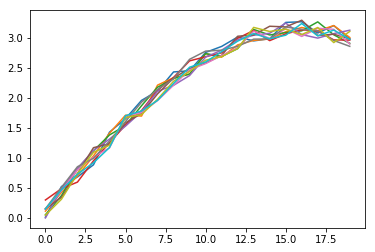

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt

for row in x:
    plt.plot(row)